In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()


In [16]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
date1 = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date1

('2017-08-23',)

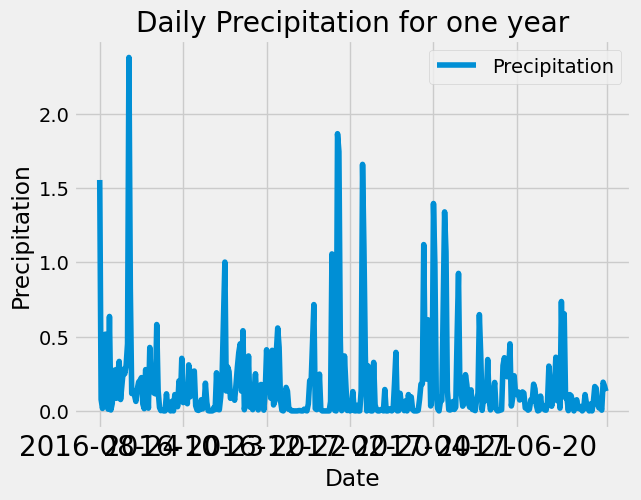

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
last_year = dt.datetime(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
year_precip = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                            filter(Measurement.date >= last_year).\
                                group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_precip_df = pd.DataFrame(year_precip, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
year_precip_df.set_index("Date", inplace = True)
precip_sorted = year_precip_df.sort_values("Date")


# Use Pandas Plotting with Matplotlib to plot the data
precip_sorted.plot(xticks=(0,60,120,180,240,300,365))
plt.xticks(size = 20)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Daily Precipitation for one year")
plt.rcParams["figure.figsize"] = [30, 4]
plt.rcParams["figure.autolayout"] = True


In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_sorted.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
total_stations

9

In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
meas_count = func.count(Measurement.station)

active_stations = session.query(Measurement.station, meas_count).\
    group_by(Measurement.station).\
        order_by(meas_count.desc()).all()

print(active_stations)

station_1 = active_stations[0][0]

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == station_1).all()


print(f"Min, Max and AVG: {stats}")

Min, Max and AVG: [(54.0, 85.0, 71.66378066378067)]


Text(0.5, 1.0, 'Temp Readings for Station: USC00519281')

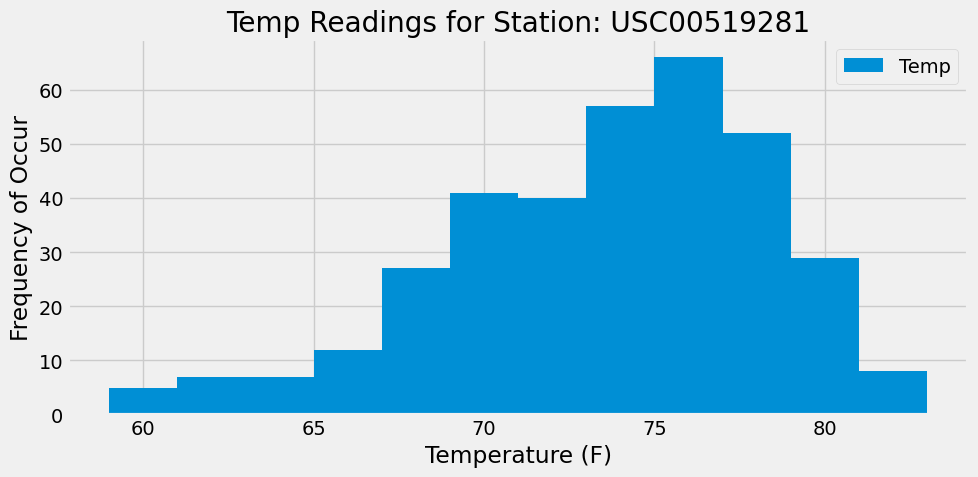

In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
MAS_weather = session.query(Measurement.station, Measurement.tobs).\
                            filter(Measurement.station == station_1).\
                                filter(Measurement.date >= last_year).\
                                    group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
MAS_weather_df = pd.DataFrame(MAS_weather, columns = ["Station", "Temp"])

# Sort the dataframe by date
MAS_weather_df.set_index("Station", inplace = True)



# Use Pandas Plotting with Matplotlib to plot the data
MAS_weather_df.plot.hist(bins=12, figsize=(10,5))
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency of Occur")
plt.title(f"Temp Readings for Station: {station_1}")


# Close Session

In [27]:
# Close Session
session.close()